**Author**: J W Debelius<br>
**Date**: 25 August 2015<br>
**virtualenv**: power_play

In [1]:
%%javascript
IPython.load_extensions('calico-spell-check', 'calico-document-tools')

<IPython.core.display.Javascript object>

Statistical power measures the probability of finding a significant result of a statistical test, for a given critical value, sample size, and effect size. Traditionally, power has been defined using test-based methods, which have been discussed extensively elsewhere
% \cite{Liu2014}.

Let $\{S_{1}, S_{2}, ... S_{k}\}$ be a set of samples where the $i$th sample contains $N_{i}$ observations and is characterized by a parameter, $X_{i}$. The sample paramter, $X_{i}$ approximates a paramter for the underlying population, $\chi_{i}$. Supposed we wish to test the alternative hypotheses, 

$\begin{matrix}
\textbf{H}_{0} & \chi_{i} = \chi_{j} & \forall \textrm{ }i, j \textrm{ } | \textrm{ }i \neq j,\textrm{ }\{i, j\textrm{ }\epsilon\textrm{ }\mathbb{N},\textrm{ }1\leq i, j \leq k\}\\
\textbf{H}_{1} & \chi_{i} \neq \chi_{j} & \exists\textrm{ }i, j \textrm{ } | \textrm{ }i \neq j,\textrm{ }\{i, j\textrm{ }\epsilon\textrm{ }\mathbb{N},\textrm{ }1\leq i, j \leq k\}\\
\end{matrix}\tag{1}$

There are four possible outcomes of the test. 

We can use a statistical test, $\textbf{F}$, to examine the probability of a false negative. We evaluate $\textbf{F}(S_{1}, S_{2}, ... S_{k}) = a$, where $a$ is drawn from the $A$ distribution with parameters $c$. The probability of a False Negative, $p_{a}$ is $A(a, c)$. We reject $\textbf{H}_{0}$ when $p_{a}$ is less than some predetermined critical value, $\alpha$. So, a statistical test can measure the probability of a false negative.

The probability of a false positive is harder to measure by a direct test. This value is typically defined for each test. When the null hypothesis is true, $a$ is drawn from an $A$ distribution with parameters, $c$. If the alternative hypothesis is true, $a'$ should be drawn from an $A'$ distribution, characterized by parameters $c$ and a noncentrality parameter, $\lambda$. The two-tailed probability of a false negative, $\beta$ is given by equation ().
$\begin{align*}
\beta = P \left [A' < a_{1 - \alpha/2} \right ] - P \left [A' < a_{\alpha/2} \right ]
\end{align*}\tag{2}$

Statistical Power is defined as 
$\begin{align*}
PWR = 1 - \beta
\end{align*}\tag{3}$
which allows us to rewrite equation () as equation ().
$\begin{align*}
PWR &= 1 - \beta\\
&= 1 - \left ( P \left [A' < a_{1 - \alpha/2} \right ] - P \left [A' < a_{\alpha/2} \right ] \right )\\
&= 1 - P \left [A' < a_{1 - \alpha/2} \right ] + P \left [A' < a_{\alpha/2} \right ]\\
&= 1 - \Phi_{A'} \left (a_{1 - \alpha/2}(c), c, \lambda \right ) + \Phi_{A'} \left (a_{\alpha/2}(c), c, \lambda \right )\\
\end{align*}\tag{4}$
Where $\Phi_{A'}$ is the cumulative probability distribution function from the non-central $A$ distribution with non centrality parameter, $\lambda$.

Let's consider for a difference in means between two samples of size $n$ drawn from defined populations with means $\mu_{1}$ and $\mu_{2}$ and the same variance, $\sigma^{2}$. 

$\begin{matrix}
\textbf{H}_{0} & \mu_{1} = \mu_{2}\\
\textbf{H}_{1} & \mu_{1} \neq \mu_{2}\\
\end{matrix}\tag{5}$

We can test these hypotheses using a $Z$ test. For a $Z$ test, the test statistic, $z$ is calculated as
$\begin{align*}
z = \sqrt{\frac{n}{2}}\frac{\left (\mu_{1} - \mu_{2}\right )}{\sigma}
\end{align*}\tag{6}$

If the alternative hypothesis is true, the noncentrality parameter, $\lambda_{z}$ is given by
$\begin{align*}
\lambda_{z} = \left ( \frac{\mu_{1} - \mu_{2}}{\sigma} \right )\sqrt{\frac{n}{2}}
\end{align*}\tag{7}$

The power, as described by equation () can be calculating by substituting in equations (), ().

$\begin{align*}
PWR &= 1 - \Phi_{Z'}\left (z_{1 - \alpha/2}, \lambda_{z} \right ) + \Phi_{Z'} \left (z_{\alpha/2}, \lambda_{z} \right )\\
&= \Phi_{Z} \left (\lambda_{z} - z_{1 - \alpha/2} \right ) + \Phi_{Z} \left ( z_{\alpha/2} - \lambda_{z} \right )\\
&= \Phi_{Z} \left (\sqrt{\lambda_{z}^{2}} - z_{1 - \alpha/2} \right )
\end{align*}\tag{8}$

We can use equations (), (), and () to say that for a two-tailed test,
$\begin{align*}
1 - \beta &= \Phi_{Z} \left (\sqrt{\lambda_{z}^{2}} - z_{1 - \alpha/2} \right )\\
z_{1 - \beta} &= \sqrt{\lambda_{z}^{2}} - z_{1 - \alpha/2}\\
z_{1 - \beta} + z_{1 - \alpha/2} &= \sqrt{\frac{n}{2}\left (\frac{\mu_{1} - \mu_{2}}{\sigma} \right )^{2}}\\
\end{align*}\tag{9}$

Cohen defined the standard effect size, $\delta$ for a Z test as equation ().
$\begin{align*}
\delta_{z} = \frac{\mu_{1} - \mu_{2}}{\sigma}
\end{align*}\tag{10}$

We can substitute $\delta_{z}$ into equation (\ref{eq:sub_pwr}), which lets us approximate the effect size as a function of the power and number of observations.
$\begin{align*}
z_{1 - \beta} + z_{1 - \alpha/2} = \sqrt{\frac{\delta_{z}^{2}n}{2}}
\end{align*}\tag{11}$
$\begin{align*}
\delta_{z} = \sqrt{\frac{2 \left (z_{1 - \beta} + z_{1 - \alpha/2} \right )^{2}}{n}}
\end{align*}\tag{12}$

We can estimate a pseudo effect size, $\widehat{\delta}_{x}$, based on the z distribution and equation ().

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.special as sp
import absloute_power.traditional as trad
import absloute_power.utils as ap

from scipy.stats import norm as Z

% matplotlib inline

We're going to compare the estimted z effect to Cohen's D (citation needed). This is used as a traditional effect size.

In [4]:
def get_cohen_ttest_ind(sample1, sample2):
    x1, s1, n1 = sample1.mean(), sample1.std(), len(sample1)
    x2, s2, n2 = sample2.mean(), sample2.std(), len(sample2)
    
    spool = np.sqrt(((n1-1) * np.square(s1) + (n2 - 1) * np.square(s2)) / (n1 + n2 - 2))
    return (x1 - x2) / spool

In [5]:
def cohen_ttest_1(sample1, x0):
    x1, s1, n1 = sample1.mean(), sample1.std(), len(sample1)
    return (x1 - x0) / s1

Finally, we're going to set up a way to simulate the distributions. We're going to use a two-sample t test initially for this validation.

In [34]:
def emp_ttest_ind(sample1, sample2):
    return scipy.stats.ttest_ind(sample1, sample2)[1]

In [7]:
def ttest_ind_simulate(mu_lim, sigma_lim, counts_lims):
    """..."""
    # Gets the distribution paramters
    mu1, mu2 = np.random.randint(*mu_lim, size=2)
    sigma1, sigma2 = np.random.randint(*sigma_lim, size=2)
    n = np.random.randint(*counts_lims)
    
    # Returns a pair of distributions
    samples =  [mu1 + np.random.randn(n) * sigma1, mu2 + np.random.randn(n) * sigma2]
    return [mu1, mu2, sigma1, sigma2, n], samples

Let's simulate power

In [8]:
counts = np.arange(5, 60, 5)
alpha = 0.05
num_runs = 100
mu_lim = [0, 20]
simga_lim = [5, 25]
counts_lim = [60, 61]

In [35]:
counts

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

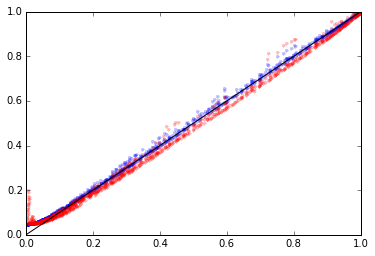

In [33]:
simulations = []
for idx in xrange(num_runs):
    # Draws a distribution
    params, [sample1, sample2] = ttest_ind_simulate(mu_lim, simga_lim, counts_lim)
    
    # Calculates power in the traditional manner
    trad_power = trad.calc_ttest_ind(sample1, sample2, counts, alpha)
    
    # Calculates the effect sizes from the traditional power
    cohen_d = get_cohen_ttest_ind(sample1, sample2)
    textr_d = ap.z_effect(counts, trad_power, alpha)
    
    # Calculates power from the effect size
    cohn_power = ap.z_power(counts, cohen_d)
    extr_power = ap.z_power(counts, extr_ef.mean())

    # Updates the tracking
    params.append(np.absloute(cohen_d))
    params.append(extr_ef)
    simulations.append((params, trad_power, cohn_power, extr_power))
    
parameters, trad_power, cohen_power, extr_power = zip(*simulations)
plt.plot(trad_power, cohen_power, 'b.', alpha=0.25)
plt.plot(trad_power, extr_power, 'r.', alpha=0.25)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), 'k-')

In [40]:
x1, x2, s1, s2, n, cohen, extr_ = zip(*parameters)

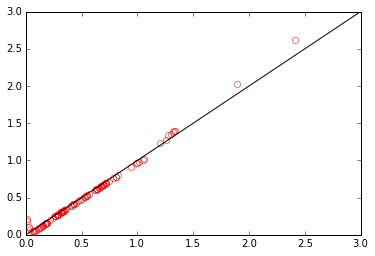

In [53]:
# extr_ = [e.mean() for e in extr_]
plt.plot(np.absolute(cohen), np.absolute(extr_), 'o', mfc='none', mec='r')
plt.plot(np.arange(0, 3.1, 0.1), np.arange(0, 3.1, 0.1), 'k-')

In [52]:
simulations = []
for idx in xrange(num_runs):
    # Draws a distribution
    params, [sample1, sample2] = ttest_ind_simulate(mu_lim, simga_lim, counts_lim)
    # Calculates power in the traditional manner
    trad_power = trad.calc_ttest_ind(sample1, sample2, counts, alpha)
    # Calculates the effect sizes
    cohen_d = get_cohen_ttest_ind(sample1, sample2)
    extr_ef = ap.z_effect(counts, trad_power, alpha)
    # Calculates power from the effect size
    cohn_power = ap.z_power(counts, cohen_d)
    extr_power = ap.z_power(counts, extr_ef.mean())
    # Updates the tracking
    params.append(cohen_d)
    params.append(extr_ef)
    simulations.append((params, trad_power, cohn_power, extr_power))
    
parameters, trad_power, cohen_power, extr_power = zip(*simulations)
plt.plot(trad_power, cohen_power, 'b.', alpha=0.25)
plt.plot(trad_power, extr_power, 'r.', alpha=0.25)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), 'k-')

array([ 0.09408713,  0.17053126,  0.24337034,  0.31399518,  0.38179451,
        0.44605756,  0.50624597,  0.56202401,  0.61323563,  0.65987019,
        0.70202859])

In [51]:
parameters[0]

[0,
 10,
 14,
 19,
 60,
 -0.4792619347298937,
 array([ 0.40727899,  0.4507448 ,  0.46171619,  0.46656454,  0.4692906 ,
         0.47104144,  0.47226374,  0.47316692,  0.4738623 ,  0.47441457,
         0.47486401])]

In [53]:
extr_power[0]

array([ 0.10042458,  0.17905605,  0.23205983,  0.31053907,  0.36133113,
        0.43416739,  0.48006051,  0.54443074,  0.58421407,  0.6391041 ,
        0.67253182])

In [41]:
counts

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

In [46]:
def z_effect(counts, power, alpha=0.05):
    """Estimates the effect size for power based on the z distribution

    This is based on the equations in
        Lui, X.S. (2014) *Statistical power analysis for the social and
        behavioral sciences: basic and advanced techniques.* New York:
        Routledge. 378 pg.
    The equation assumes a positive magnitude to the effect size and a
    two-tailed test.

    Parameters
    ----------
    counts : array
        The number of observations for each power depth
    power : array
        The statistical power at the depth specified by `counts`
    alpha : float
        The critial value used to calculate the power

    Returns
    effect : array
        T A standard measure of the difference between the underlying
        populations
    """
    z_diff = z.ppf(power) + z.ppf(1 - alpha/2)
    eff = np.sqrt(2 * np.square(z_diff) / counts)
    eff = eff[np.isinf(eff) is False]
    return eff


In [48]:
z = Z

In [54]:
z_effect(counts, trad_power[0])

0.40727898543282598

In [56]:
estimate_z_effect(counts, trad_power[0]).mean()

0.46320073720216759

In [57]:
z_diff = z.ppf(trad_power[0]) + z.ppf(1 - alpha / 2)

In [58]:
z_diff

array([ 0.64396462,  1.00789602,  1.26446185,  1.47540663,  1.65919284,
        1.82433567,  1.97562096,  2.11606681,  2.24772624,  2.37207287,
        2.4902079 ])

In [60]:
eff = np.sqrt(2 * np.square(z_diff) / counts)
eff

array([ 0.40727899,  0.4507448 ,  0.46171619,  0.46656454,  0.4692906 ,
        0.47104144,  0.47226374,  0.47316692,  0.4738623 ,  0.47441457,
        0.47486401])

In [63]:
eff[np.isnan(eff) == False].mean()

0.46320073720216759